# Lab 6 - Logistic Regression using SciKit-Learn

Goal: To categorize the species of an Iris flower based on the dimensions of its parts, with a binary classification comprising two classes: virginica and non-virginica.

In [116]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from plotly.subplots import make_subplots

## Load iris dataset using sklearn

In [117]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

## Redefine Classes


The original dataset consists of 3 classes, with the target values: 0 = setosa, 1 = versicolor, and 2 = virginica. We are reorganizing the dataset into 2 classes: Virginica will be designated as class 1, and the Non-Virginica classes will be designated as class 0.

In [118]:
# Redefine the target class: 0 for non-virginica, 1 for virginica
target_bin = np.where(target == 2, 1, 0)

# Convert DataFrame for visualization
iris_df = pd.DataFrame(data, columns=iris.feature_names)

# Add species class 
iris_df['Class'] = target_bin

## Explore the data

In [119]:
# Descriptive statistics
class_descr = iris_df.groupby('Class').describe()

#### Sepel length

In [120]:
class_descr[['sepal length (cm)']]

sepal length (cm)                                            
                  count   mean       std  min    25%  50%  75%  max
Class                                                              
0                 100.0  5.471  0.641698  4.3  5.000  5.4  5.9  7.0
1                  50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9

#### Sepel width

In [121]:
class_descr[['sepal width (cm)']]

sepal width (cm)                                             
                 count   mean       std  min  25%   50%    75%  max
Class                                                              
0                100.0  3.099  0.478739  2.0  2.8  3.05  3.400  4.4
1                 50.0  2.974  0.322497  2.2  2.8  3.00  3.175  3.8

#### Petal length

In [122]:
class_descr[['petal length (cm)']]

petal length (cm)                                             
                  count   mean       std  min  25%   50%    75%  max
Class                                                               
0                 100.0  2.861  1.449549  1.0  1.5  2.45  4.325  5.1
1                  50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

#### Petal width

In [123]:
class_descr[['petal width (cm)']]

petal width (cm)                                          
                 count   mean       std  min  25%  50%  75%  max
Class                                                           
0                100.0  0.786  0.565153  0.1  0.2  0.8  1.3  1.8
1                 50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

Based on the descriptions, it appears that the Virginica class flowers generally exhibit higher sepal length but lower sepal width compared to the Non-Virginica class flowers. However, when considering the petals, the Virginica class flowers tend to have both greater mean length and width than the Non-Virginica class flowers.Next, we create histograms for each feature

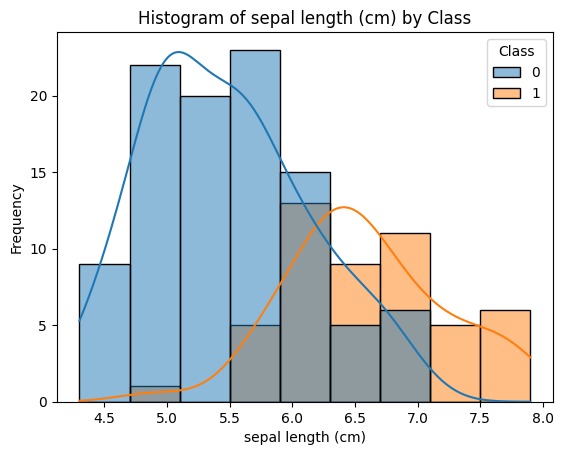

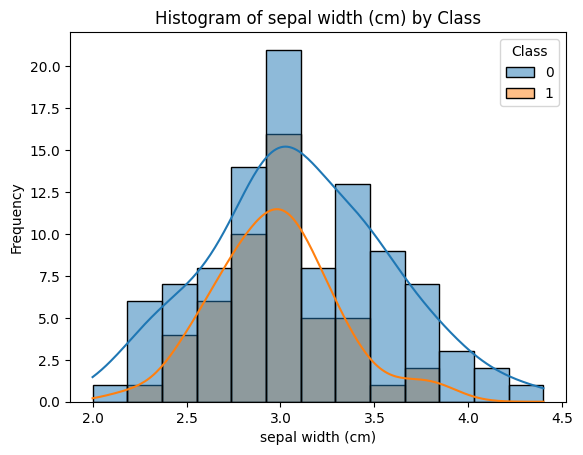

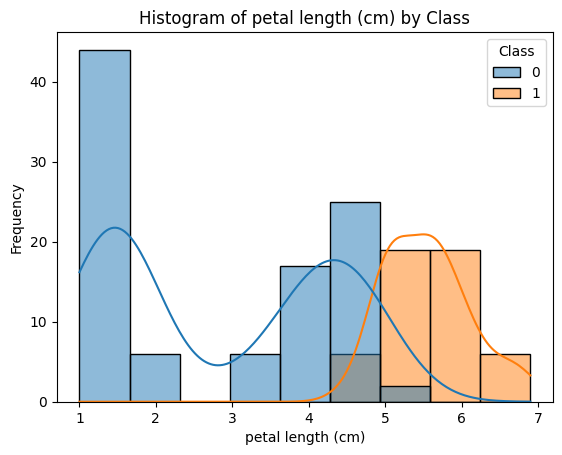

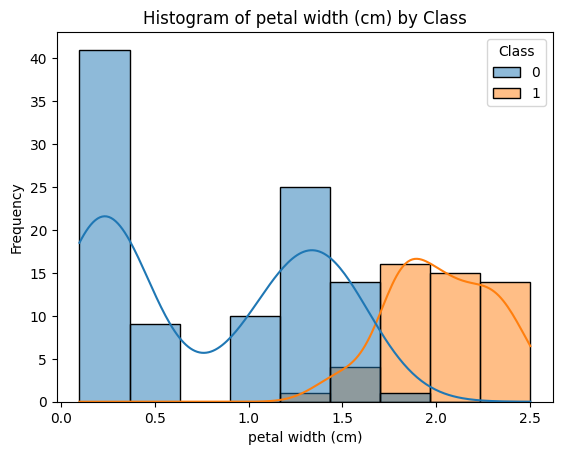

In [124]:
# Histograms for each feature
for feature in iris.feature_names:
    sns.histplot(data=iris_df, x=feature, hue='Class', kde=True)
    plt.title(f'Histogram of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

From the histograms, The initial histograms of sepal length confirm the findings from the descriptions. The majority of Virginica class flowers display sepal lengths ranging from 6 to 7 cm, whereas most Non-Virginica flowers show lengths only between 4.5 and 5.5 cm. In terms of sepal width, the distributions are quite similar for both classes, indicating that there is not much difference between the two classes.

The subsequent two histograms provide further support for our findings. The length and width values are relatively evenly distributed for Non-Virginica classes, while they are almost normally distributed for the Virginica class. Additionally, the Virginica class showcases the highest values for both length and width.

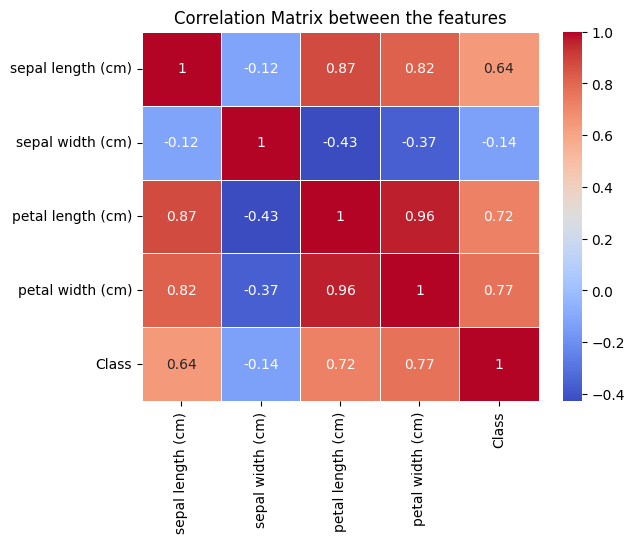

In [125]:
# Correlation matrix between the four features
corr = iris_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between the features')
plt.show()

 The correlation matrix indicates that the classes exhibit a positive correlation with sepal length, petal length, and petal width, and a negative correlation with sepal width. Furthermore, the data suggests that petal width demonstrates the highest correlation with flower class. Following this, petal length displays a higher correlation compared to sepal length. Therefore, the most effective approach to predicting the flower class from the data is by examining the characteristics of the petal. As both petal length and width increase, the likelihood of the flower being classified as Virginica also increases.  

### Additional Graphs

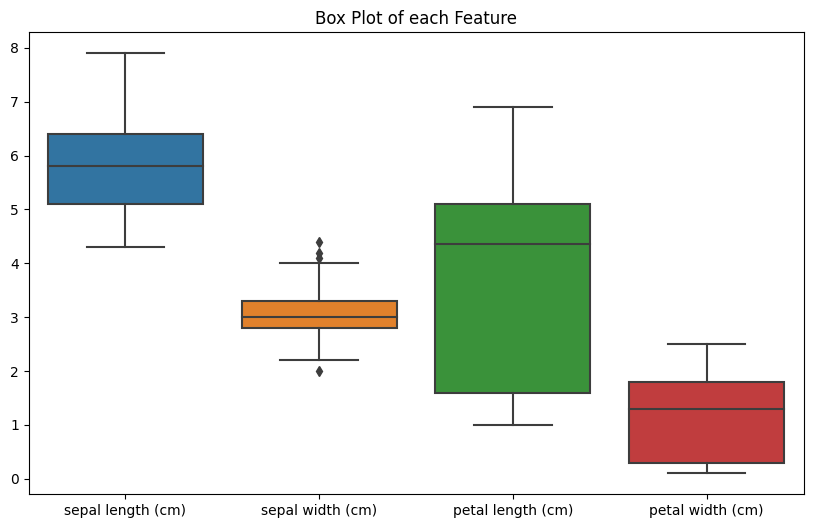

In [126]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df.drop('Class', axis=1))
plt.title('Box Plot of each Feature')
plt.show()

Boxplot visualize the distribution of a length and width of sepal and petal.This graph illustrates a visual representation of the data description.

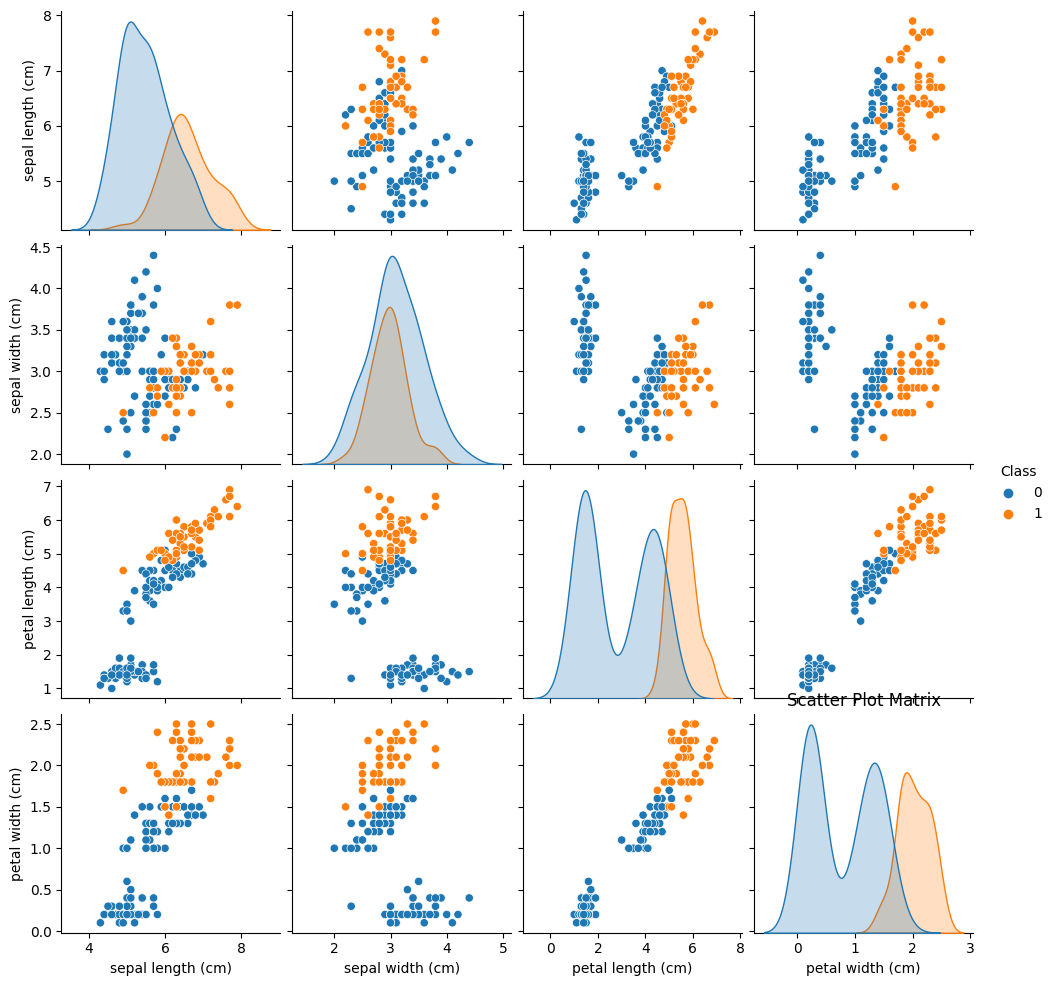

In [127]:
# Pair plot 
sns.pairplot(iris_df, hue='Class')
plt.title('Scatter Plot Matrix')
plt.show()

Pairplot is used to explore the relationships between all pairwise combinations of features in the dataset which is same as correlation matrix

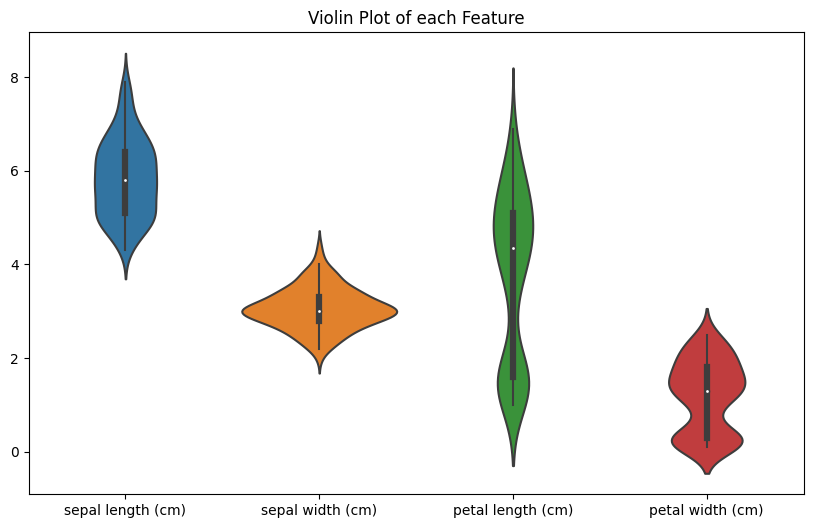

In [128]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=iris_df.drop('Class', axis=1))
plt.title('Violin Plot of each Feature')
plt.show()

A violinplot is similar to a boxplot but also shows the probability density of the data, allowing for a better comparison of the distribution of features between species.

### Insights

- The boxplot shows that the virginica species has a higher median petal width compared to the other species.

- The pairplot shows that there is a clear separation between the species based on the petal length and width features, while the sepal length and width features have some overlap.

- The violinplot shows that the distribution of petal width for the virginica species is wider compared to the other species, indicating more variability in this feature.

## Split data into training set, a validation set and a test set.

In [129]:
# Splitting Data
data_tr_val, data_te, target_tr_val, target_te = train_test_split(data, target_bin, test_size=15, random_state=42)
data_tr, data_val, target_tr, target_val = train_test_split(data_tr_val, target_tr_val, test_size=15, random_state=42)

Initially, 15 rows are split to form the test set. Subsequently, from the remaining 135 rows, an additional 15 rows are allocated to the validation set. The remaining 120 rows then constitute the training set.

## Logistic regression models models, with 1,2,3 and 4 features of dataset

In [130]:
# Logistic Regression Models
models = []
features_sets = [[0], [0, 1], [0, 1, 2], [0, 1, 2, 3]]
for features in features_sets:
    data_tr_subset = data_tr[:, features]
    data_val_subset = data_val[:, features]
    model = LogisticRegression()
    model.fit(data_tr_subset, target_tr)
    models.append((model, features))

## Model Evaluation

According to the 15 validation rows, we will compare the accuracy between the predicted probability of the flower class being Virginica and the actual ground truth (Target) value. Subsequently, we will determine the model that demonstrates the optimal performance.

In [131]:
# Evaluation on Validation Set
failure_indices = []
for model, features in models:
    target_pred = model.predict(data_val[:, features])
    target_pred_proba = model.predict_proba(data_val[:, features])[:, 1]
    validation_results = pd.DataFrame({
        'Probability of Virginica': target_pred_proba,
        'Predicted Value': target_pred,
        'Ground Truth': target_val
    })
    print(f"Model with features: {features}")
    print(validation_results)
    
    # Here, we can summarize the validation results using a single-number measure like accuracy.
    accuracy = accuracy_score(target_val, target_pred)
    print(f"Single-number measure (Accuracy): {accuracy}\n")
    
    failure_indices.append([i for i, (true, pred) in enumerate(zip(target_val, target_pred)) if true != pred]) 

Model with features: [0]
    Probability of Virginica  Predicted Value  Ground Truth
0                   0.576720                1             1
1                   0.064688                0             0
2                   0.418391                0             0
3                   0.018915                0             0
4                   0.064688                0             0
5                   0.167034                0             0
6                   0.761502                1             1
7                   0.198786                0             0
8                   0.524087                1             0
9                   0.319692                0             1
10                  0.064688                0             0
11                  0.275261                0             0
12                  0.720719                1             0
13                  0.797999                1             1
14                  0.052939                0             0
Single-number m

Among the four models considered, the ones utilizing features [0, 1, 2, 3] and [0, 1, 2] have demonstrated the highest level of accuracy in their predictions. However, when comparing the two, the model incorporating all four features has notably outperformed the other model by consistently predicting the correct values with the highest probability. This insight suggests that the inclusion of all four features contributes to the model's superior predictive performance.  

In [132]:
def plot_decision_boundary(model, X, y):
    if len(model[1]) == 1:
        # Decision boundary with 1 feature
        decision_boundary = -model[0].intercept_ / model[0].coef_[0]
        trace = go.Scatter(x=decision_boundary, y=[0],
                           mode='markers',
                           line=dict(color='red', width=2),
                           name='Decision Boundary')
        layout = dict(title='Decision Boundary with 1 Feature',
                      xaxis=dict(title=iris.feature_names[model[1][0]]),
                      yaxis=dict(title='Decision Boundary'))
    elif len(model[1]) == 2:
        # Decision boundary with 2 features
        MIN_FEATURE_VALUE = X[:, model[1][0]].min()
        MAX_FEATURE_VALUE = X[:, model[1][0]].max()
        decision_boundary_x1 = np.linspace(MIN_FEATURE_VALUE, MAX_FEATURE_VALUE, 10)
        decision_boundary_x2 = -model[0].intercept_ / model[0].coef_[0][1] - \
                                model[0].coef_[0][0] / model[0].coef_[0][1] * decision_boundary_x1
        trace = go.Scatter(x=decision_boundary_x1, y=decision_boundary_x2,
                           mode='lines',
                           line=dict(color='red', width=2),
                           name='Decision Boundary')
        layout = dict(title='Decision Boundary with 2 Features',
                      xaxis=dict(title=iris.feature_names[model[1][0]]),
                      yaxis=dict(title=iris.feature_names[model[1][1]]))
    elif len(model[1]) == 3:
        # Decision boundary with 3 features
        x1, x2 = np.meshgrid(np.linspace(X[:, model[1][0]].min(), X[:, model[1][0]].max(), 10),
                             np.linspace(X[:, model[1][1]].min(), X[:, model[1][1]].max(), 10))
        decision_boundary_x3 = -model[0].intercept_ / model[0].coef_[0][2] - \
                                model[0].coef_[0][0] / model[0].coef_[0][2] * x1 - \
                                model[0].coef_[0][1] / model[0].coef_[0][2] * x2
        trace = go.Surface(x=x1, y=x2, z=decision_boundary_x3,
                           colorscale='RdBu',
                           name='Decision Boundary')
        layout = dict(title='Decision Boundary with 3 Features',
                      scene=dict(xaxis_title=iris.feature_names[model[1][0]],
                                 yaxis_title=iris.feature_names[model[1][1]],
                                 zaxis_title=iris.feature_names[model[1][2]]))
    return trace, layout

for i, model in enumerate(models[:3]):
    trace, layout = plot_decision_boundary(model, data_val, target_val)
    fig = go.Figure(data=trace, layout=layout)
    fig.show()

In the plot, the decision boundary for the 1 feature model is depicted as a single point. Meanwhile, the 2 feature model is represented by a line that separates the classes, and the 3 feature model is characterized by a surface plane serving as the boundary.

### Failure Modes

In [133]:
for i, indices in enumerate(failure_indices):
    failure_instance = data_te[indices]
    print(f"Failure instances for {i+1} feature model:\n", failure_instance)


# We can analyze failure modes by examining instances where the model's predictions do not match the ground truth.

Failure instances for 1 feature model:
 [[6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [5.5 3.5 1.3 0.2]]
Failure instances for 2 feature model:
 [[6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [5.5 3.5 1.3 0.2]]
Failure instances for 3 feature model:
 []
Failure instances for 4 feature model:
 []


 The models with 1 and 2 features share 3 instances of failure. In these cases, some values fall between the means of both classes. This indicates that when using only 1 or 2 features, there may not be sufficient data to accurately predict the probability. As a result, when utilizing 3 or more features, the models exhibit the highest accuracy due to the increased information available for accurate predictions.  

## Best Model (Recommended)

After evaluating the 4 models, it is evident that those incorporating more features tend to perform well. Therefore, it is anticipated that models 3 and 4, which involve 3 and 4 features respectively (sepal length, sepal width, petal length, and petal width), will likely deliver the best performance overall.

In [134]:
best_model = models[2]
data_te_subset = data_te[:, best_model[1]]
target_te_pred = best_model[0].predict(data_te_subset)
test_accuracy = accuracy_score(target_te, target_te_pred)
print(f"Test Accuracy of the model 3: {test_accuracy}")

Test Accuracy of the model 3: 1.0


In [135]:
best_model = models[3]
data_te_subset = data_te[:, best_model[1]]
target_te_pred = best_model[0].predict(data_te_subset)
test_accuracy = accuracy_score(target_te, target_te_pred)
print(f"Test Accuracy of the model 4: {test_accuracy}")

Test Accuracy of the model 4: 1.0


Upon evaluating both models with the test dataset, it becomes evident that both models achieve a remarkable 100% accuracy. Consequently, either of the two models can be considered as the most effective option. In my opinion, model 4 stands out as it checks all 4 features, ensuring thorough analysis and robust predictions. However, model 3 may offer greater efficiency by requiring less internal computation due to its utilization of one less feature, without significantly compromising accuracy.